In [2]:
from google.colab import drive
drive.mount('/content/drive')
import os

data_dir = "/content/drive/MyDrive/cats_dogs_dataset"
print("Contents of dataset folder:", os.listdir(data_dir))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Contents of dataset folder: ['validation', 'train', 'test']


In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import os
from google.colab import drive

In [4]:
data_dir = "/content/drive/MyDrive/cats_dogs_dataset"
img_size = (180, 180)
batch_size = 32


In [5]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    os.path.join(data_dir, "train"),
    image_size=img_size,
    batch_size=batch_size
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    os.path.join(data_dir, "validation"),
    image_size=img_size,
    batch_size=batch_size
)
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    os.path.join(data_dir, "test"),
    image_size=img_size,
    batch_size=batch_size
)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


Classes: ['cats', 'dogs']


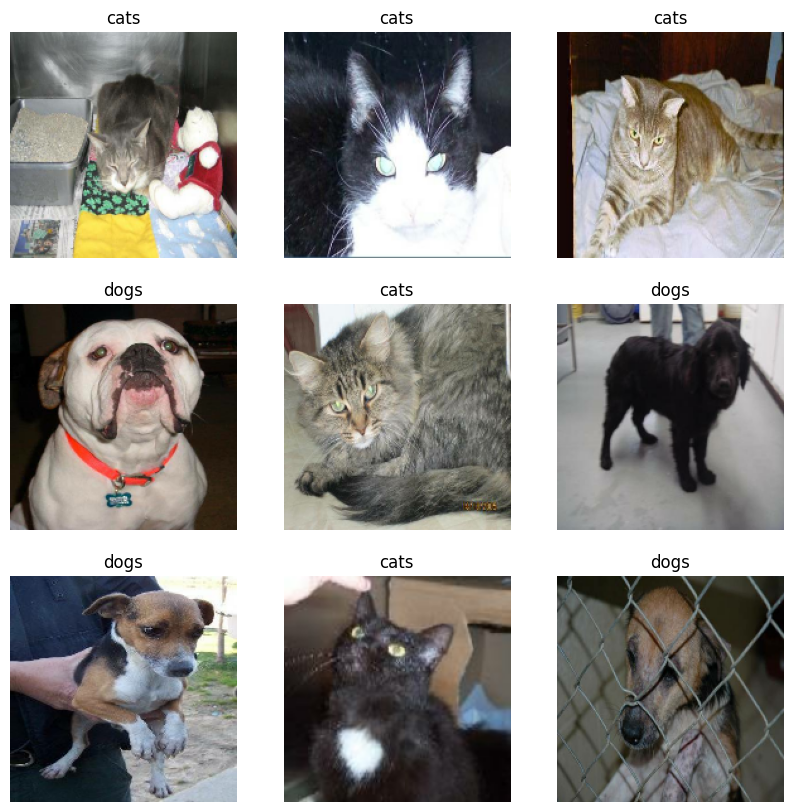

In [6]:
import matplotlib.pyplot as plt
class_names = train_ds.class_names
print("Classes:", class_names)
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [7]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(180, 180, 3)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [9]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 290s 5s/step - accuracy: 0.5051 - loss: 0.7500 - val_accuracy: 0.5770 - val_loss: 0.6824
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 193s 3s/step - accuracy: 0.5962 - loss: 0.6760 - val_accuracy: 0.6270 - val_loss: 0.6353
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 161s 3s/step - accuracy: 0.6902 - loss: 0.6025 - val_accuracy: 0.6980 - val_loss: 0.5876
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 221s 3s/step - accuracy: 0.7496 - loss: 0.5128 - val_accuracy: 0.6990 - val_loss: 0.5832
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 202s 3s/step - accuracy: 0.7829 - loss: 0.4421 - val_accuracy: 0.7170 - val_loss: 0.5756
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 187s 3s/step - accuracy: 0.8365 - loss: 0.3479 - val_accuracy: 0.7260 - val_loss: 0.6283
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 165s 3s/step - accuracy: 0.8952 - loss: 0.2477 - val_accuracy: 0.7290 - val_loss: 0.6807
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 217s 3s/step - accuracy: 0.9389 - loss: 0.1581 - val_accuracy: 0.7150 - v

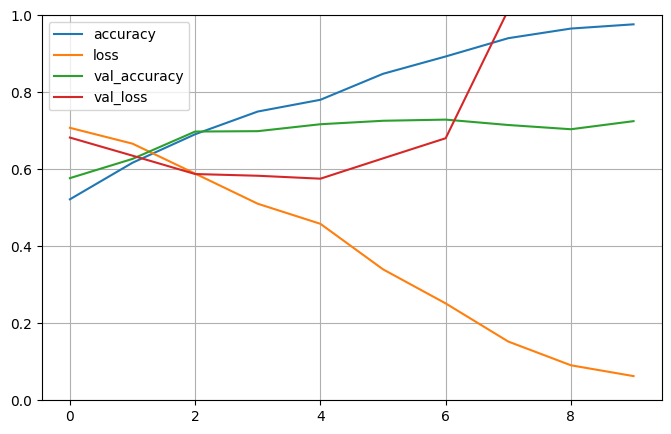

In [10]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [11]:
import tensorflow as tf
from tensorflow.keras import layers
import os
import matplotlib.pyplot as plt

# Paths and settings
data_dir = "/content/drive/MyDrive/cats_dogs_dataset"  # Your Google Drive folder
img_size = (180, 180)
batch_size = 32

# Load datasets
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    os.path.join(data_dir, "train"),
    image_size=img_size,
    batch_size=batch_size
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    os.path.join(data_dir, "validation"),
    image_size=img_size,
    batch_size=batch_size
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    os.path.join(data_dir, "test"),
    image_size=img_size,
    batch_size=batch_size
)


Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


Classes: ['cats', 'dogs']


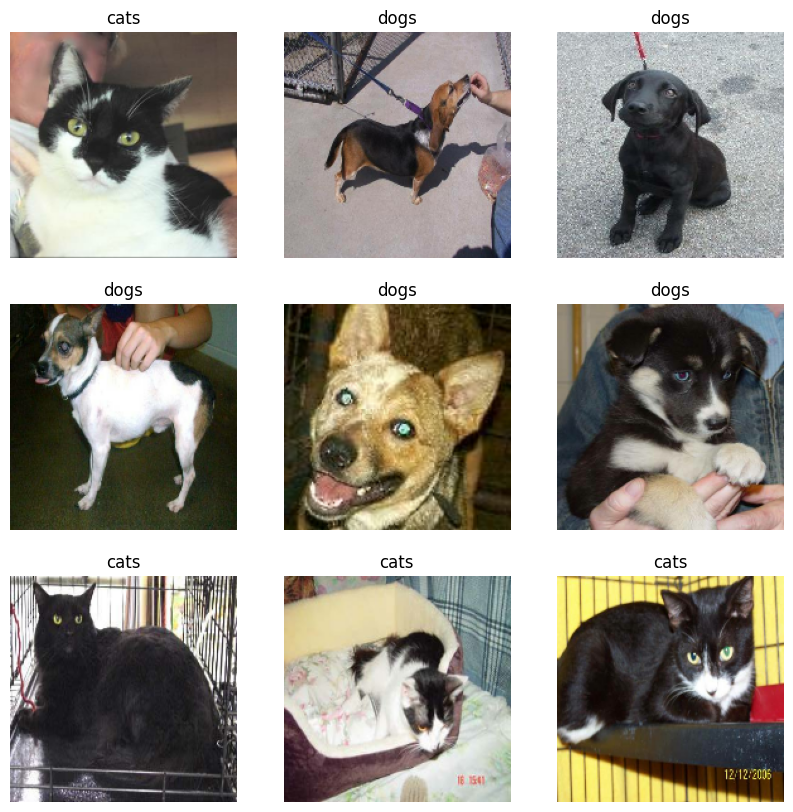

In [12]:
class_names = train_ds.class_names
print("Classes:", class_names)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):  # Take one batch
    for i in range(9):  # Show first 9 images
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")


In [13]:
from tensorflow.keras import layers, models

# Data augmentation pipeline
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

# Build CNN model
model = models.Sequential([
    data_augmentation,  # Apply augmentation first
    layers.Rescaling(1./255, input_shape=(180,180,3)),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(2, activation='softmax')  # 2 classes: cat and dog
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)


Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 208s 3s/step - accuracy: 0.5342 - loss: 0.8237 - val_accuracy: 0.5050 - val_loss: 0.6915
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 201s 3s/step - accuracy: 0.5387 - loss: 0.6894 - val_accuracy: 0.5310 - val_loss: 0.7090
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 210s 3s/step - accuracy: 0.6086 - loss: 0.6708 - val_accuracy: 0.6380 - val_loss: 0.6449
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 200s 3s/step - accuracy: 0.6586 - loss: 0.6321 - val_accuracy: 0.6480 - val_loss: 0.6099
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 205s 3s/step - accuracy: 0.6916 - loss: 0.5900 - val_accuracy: 0.6760 - val_loss: 0.5983
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 209s 3s/step - accuracy: 0.6848 - loss: 0.5865 - val_accuracy: 0.6680 - val_loss: 0.5934
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 204s 3s/step - accuracy: 0.6825 - loss: 0.5897 - val_accuracy: 0.7010 - val_loss: 0.5747
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 259s 3s/step - accuracy: 0.6995 - loss: 0.5665 - val_accuracy: 0.7160 - v

In [15]:
model.save("cats_dogs_cnn.h5")


In [16]:
from tensorflow.keras.applications import MobileNetV2

# Pre-trained MobileNetV2 (without top classifier)
base_model = MobileNetV2(input_shape=(180,180,3),
                         include_top=False,
                         weights='imagenet')
base_model.trainable = False  # freeze weights

# Build the new model
model = models.Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    base_model,                     # transfer learning feature extractor
    layers.GlobalAveragePooling2D(),# flatten features
    layers.Dense(128, activation='relu'),
    layers.Dense(2, activation='softmax')
])


/tmp/ipython-input-4118048285.py:4: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(input_shape=(180,180,3),


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [17]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)


Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 112s 2s/step - accuracy: 0.8898 - loss: 0.2782 - val_accuracy: 0.9710 - val_loss: 0.0642
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 139s 2s/step - accuracy: 0.9623 - loss: 0.1059 - val_accuracy: 0.9730 - val_loss: 0.0652
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 156s 2s/step - accuracy: 0.9623 - loss: 0.1011 - val_accuracy: 0.9720 - val_loss: 0.0604
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 139s 2s/step - accuracy: 0.9747 - loss: 0.0779 - val_accuracy: 0.9770 - val_loss: 0.0606
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - accuracy: 0.9687 - loss: 0.0791 - val_accuracy: 0.9730 - val_loss: 0.0715
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 128s 2s/step - accuracy: 0.9691 - loss: 0.0762 - val_accuracy: 0.9790 - val_loss: 0.0609
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 153s 2s/step - accuracy: 0.9811 - loss: 0.0523 - val_accuracy: 0.9780 - val_loss: 0.0623
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.9848 - loss: 0.0490 - val_accuracy: 0.9700 - v

In [18]:
test_loss, test_acc = model.evaluate(test_ds)
print(f"Test Accuracy: {test_acc:.2f}, Test Loss: {test_loss:.2f}")


32/32 ━━━━━━━━━━━━━━━━━━━━ 144s 4s/step - accuracy: 0.9742 - loss: 0.0999
Test Accuracy: 0.97, Test Loss: 0.09


In [19]:
model.save("cats_dogs_transfer_learning.h5")


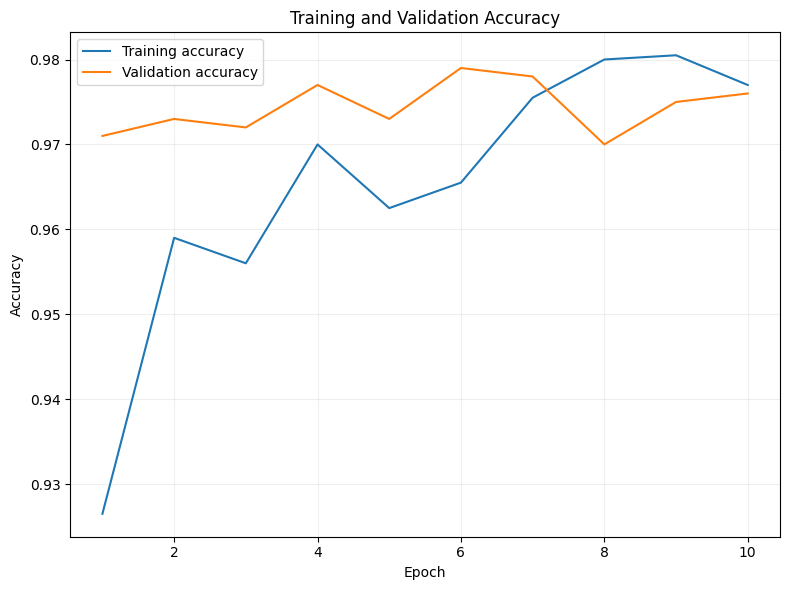

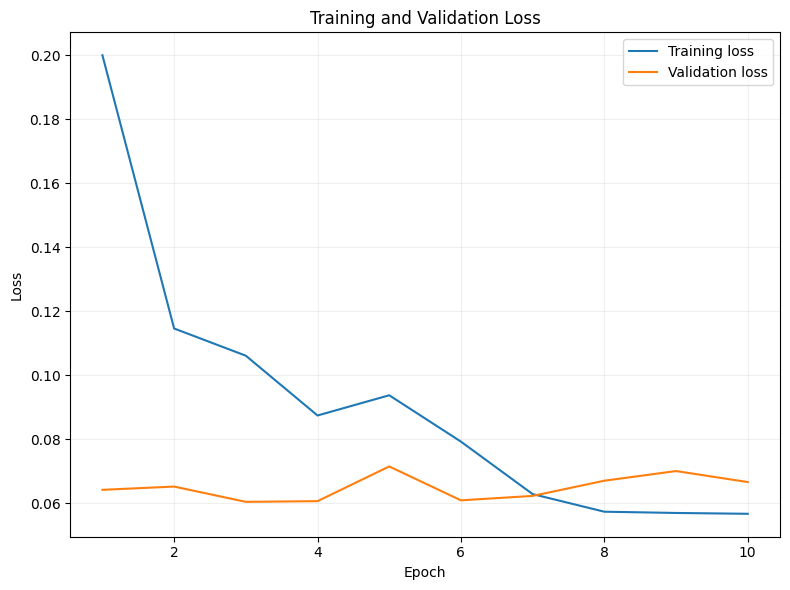

In [20]:
import matplotlib.pyplot as plt
import numpy as np

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(8,6))
plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(alpha=0.2)
plt.tight_layout()
plt.savefig('accuracy_curve.png', dpi=150)
plt.show()

plt.figure(figsize=(8,6))
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(alpha=0.2)
plt.tight_layout()
plt.savefig('loss_curve.png', dpi=150)
plt.show()


In [21]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import itertools
import os

y_true = np.concatenate([y.numpy() for x,y in test_ds], axis=0)
y_pred_probs = model.predict(test_ds, verbose=1)
y_pred = np.argmax(y_pred_probs, axis=1)

class_names = train_ds.class_names

cm = confusion_matrix(y_true, y_pred)
print("Confusion matrix:\n", cm)

report = classification_report(y_true, y_pred, target_names=class_names, digits=4)
print("\nClassification report:\n", report)

with open('classification_report.txt', 'w') as f:
    f.write("Confusion matrix:\n")
    f.write(np.array2string(cm))
    f.write("\n\nClassification report:\n")
    f.write(report)


32/32 ━━━━━━━━━━━━━━━━━━━━ 32s 965ms/step
Confusion matrix:
 [[255 245]
 [254 246]]

Classification report:
               precision    recall  f1-score   support

        cats     0.5010    0.5100    0.5055       500
        dogs     0.5010    0.4920    0.4965       500

    accuracy                         0.5010      1000
   macro avg     0.5010    0.5010    0.5010      1000
weighted avg     0.5010    0.5010    0.5010      1000



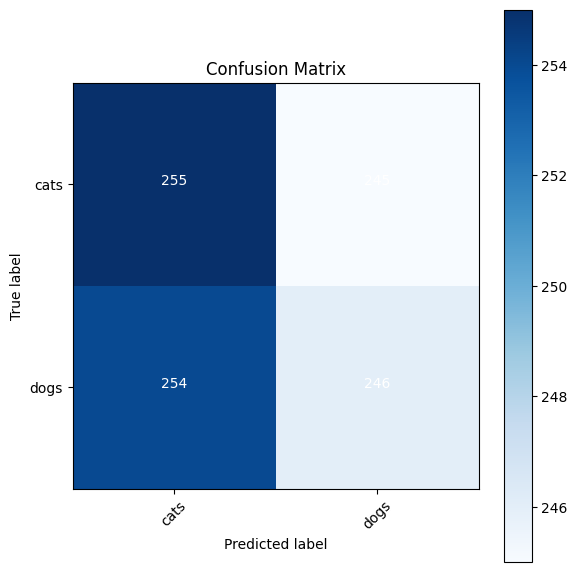

In [22]:
plt.figure(figsize=(6,6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=150)
plt.show()


32/32 ━━━━━━━━━━━━━━━━━━━━ 31s 929ms/step
Total misclassified: 495


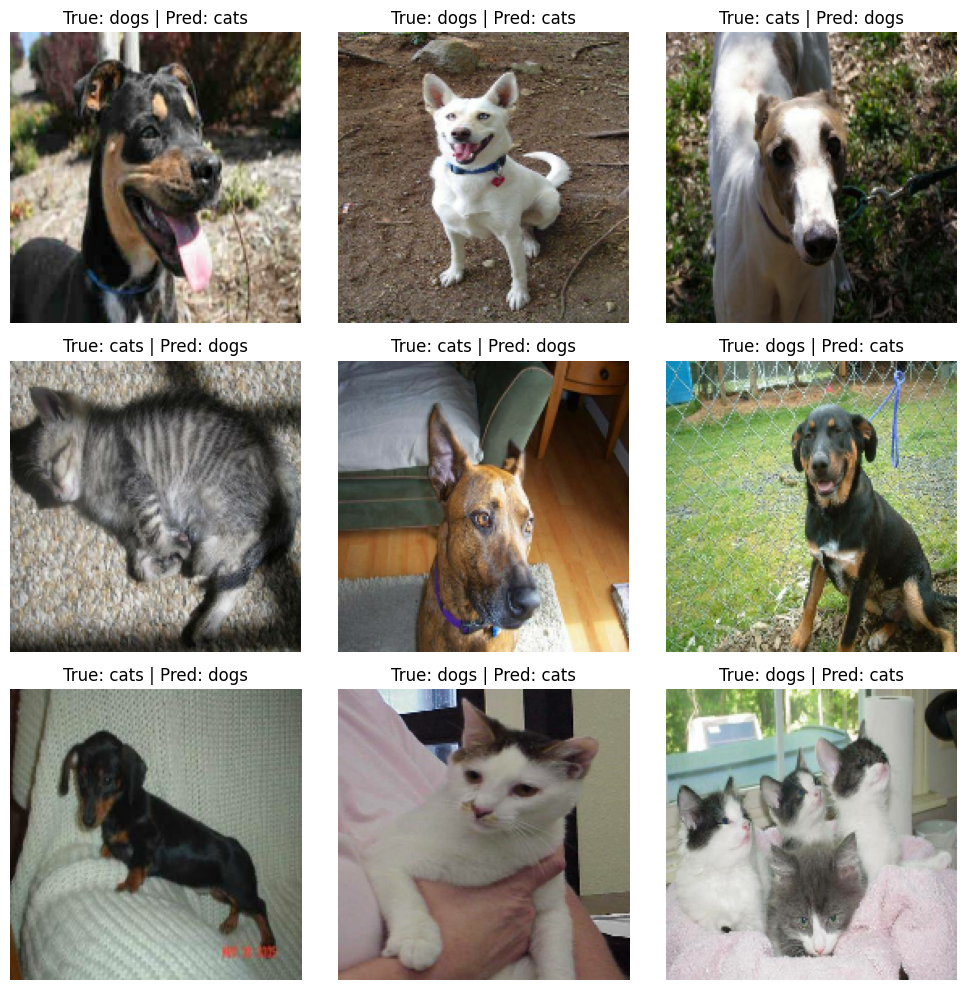

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Flatten images from test_ds into a single numpy array (may use memory)
images = np.concatenate([x.numpy() for x,y in test_ds], axis=0).astype('uint8')
y_true = np.concatenate([y.numpy() for x,y in test_ds], axis=0)
y_pred = np.argmax(model.predict(test_ds), axis=1)

mis_idx = np.where(y_true != y_pred)[0]
print("Total misclassified:", len(mis_idx))

# Show up to 9 misclassified examples
n_show = min(9, len(mis_idx))
plt.figure(figsize=(10,10))
for i, idx in enumerate(mis_idx[:n_show]):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(images[idx])
    plt.title(f"True: {class_names[y_true[idx]]} | Pred: {class_names[y_pred[idx]]}")
    plt.axis('off')
plt.tight_layout()
plt.savefig('misclassified_examples.png', dpi=150)
plt.show()


In [24]:
model_fname = "cats_dogs_transfer_learning.h5"
model.save(model_fname)

import os
print("Model size (MB):", os.path.getsize(model_fname)/1e6)
print("Accuracy plot size (MB):", os.path.getsize('accuracy_curve.png')/1e6)


Model size (MB): 11.377872
Accuracy plot size (MB): 0.071597


In [25]:
from google.colab import files
files.download(model_fname)
files.download('accuracy_curve.png')
files.download('loss_curve.png')
files.download('confusion_matrix.png')
files.download('classification_report.txt')
files.download('misclassified_examples.png')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>